In [ ]:
#Khai báo thêm thư viện chưa có sẵn
!pip install category_encoders

In [ ]:
# Upload file lên google colab
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [ ]:
import io
import pandas as pd
import seaborn as sns
import category_encoders as ce
import sklearn_pandas as skpd
from sklearn import model_selection
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics


In [ ]:
#Đọc lữ liệu
df = pd.read_csv("bank.csv")

In [ ]:
#Đặt tên cho các cột
df.columns = ['age','job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','duration','poutcome']

In [ ]:
#In thử 10 dòng đầu
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,poutcome
0,59,admin.,married,secondary,no,yes,no,unknown,may,5,1042,unknown
1,56,admin.,married,secondary,no,no,no,unknown,may,5,1467,unknown
2,41,technician,married,secondary,no,yes,no,unknown,may,5,1389,unknown
3,55,services,married,secondary,no,yes,no,unknown,may,5,579,unknown
4,54,admin.,married,tertiary,no,no,no,unknown,may,5,673,unknown
5,42,management,single,tertiary,no,yes,yes,unknown,may,5,562,unknown
6,56,management,married,tertiary,no,yes,yes,unknown,may,6,1201,unknown
7,60,retired,divorced,secondary,no,yes,no,unknown,may,6,1030,unknown
8,37,technician,married,secondary,no,yes,no,unknown,may,6,608,unknown
9,28,services,single,secondary,no,yes,no,unknown,may,6,1297,unknown


In [ ]:
#Kiểm tra dữ liệu
def show(df):
    for col in df.columns:
        print("Feature : {} Levels: {}".format(col, df[col].unique()))


show(df)


Feature : age Levels: [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
Feature : job Levels: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Feature : marital Levels: ['married' 'single' 'divorced']
Feature : education Levels: ['secondary' 'tertiary' 'primary' 'unknown']
Feature : default Levels: ['no' 'yes']
Feature : housing Levels: ['yes' 'no']
Feature : loan Levels: ['no' 'yes']
Feature : contact Levels: ['unknown' 'cellular' 'telephone']
Feature : month Levels: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Feature : day_of_week Levels: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
Feature : duration Levels: [1042 1467 1389 

In [ ]:
#Chuẩn hóa dữ liệu về dạng số và in thử 15 dòng
encoder = ce.OrdinalEncoder(cols = ['age','job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','duration','poutcome'])
df = encoder.fit_transform(df)
df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,poutcome
0,1,1,1,1,1,1,1,1,1,1,1,1
1,2,1,1,1,1,2,1,1,1,1,2,1
2,3,2,1,1,1,1,1,1,1,1,3,1
3,4,3,1,1,1,1,1,1,1,1,4,1
4,5,1,1,2,1,2,1,1,1,1,5,1
5,6,4,2,2,1,1,2,1,1,1,6,1
6,2,4,1,2,1,1,2,1,1,2,7,1
7,7,5,3,1,1,1,1,1,1,2,8,1
8,8,2,1,1,1,1,1,1,1,2,9,1
9,9,3,2,1,1,1,1,1,1,2,10,1


In [ ]:
#Kiểm tra các kiểu dữ liệu
df.dtypes

age            int64
job            int64
marital        int64
education      int64
default        int64
housing        int64
loan           int64
contact        int64
month          int64
day_of_week    int64
duration       int64
poutcome       int64
dtype: object

In [29]:
#Chia dữ liệu thành 2 phần huấn luyện
from sklearn.model_selection import train_test_split

x = df.drop(['poutcome'], axis=1)
y = df['poutcome']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=52)
print("X_train : {}".format(X_train.shape))
print("X_test : {}".format(X_test.shape))
print("Y_train : {}".format(y_train.shape))
print("Y_test : {}".format(y_test.shape))




X_train : (5581, 11)
X_test : (5581, 11)
Y_train : (5581,)
Y_test : (5581,)


In [30]:
#Bắt đầu huấn luyện
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
def evaluation_parametrics(y_train, yp_train, y_test, yp_test):
    print("Classification Report for train data")
    print(classification_report(y_train, yp_train))
    print("Classification Report for test data")
    print(classification_report(y_test, yp_test))
    print("Accuracy on train data is {}".format(round(accuracy_score(y_train,yp_train),2)))
    print("Accuracy on test data is {}".format(round(accuracy_score(y_test,yp_test),2)))
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=52)

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra


clf = clf.fit(X_train, y_train)

yp_train = clf.predict(X_train)
yp_test = clf.predict(X_test)

evaluation_parametrics(y_train, yp_train, y_test, yp_test)


Classification Report for train data
              precision    recall  f1-score   support

           1       0.75      1.00      0.85      4159
           2       1.00      0.00      0.01       278
           3       0.57      0.01      0.01       617
           4       0.50      0.02      0.05       527

    accuracy                           0.75      5581
   macro avg       0.70      0.26      0.23      5581
weighted avg       0.72      0.75      0.64      5581

Classification Report for test data
              precision    recall  f1-score   support

           1       0.75      1.00      0.86      4167
           2       0.00      0.00      0.00       259
           3       1.00      0.00      0.00       611
           4       0.38      0.03      0.05       544

    accuracy                           0.75      5581
   macro avg       0.53      0.26      0.23      5581
weighted avg       0.71      0.75      0.64      5581

Accuracy on train data is 0.75
Accuracy on test data is 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


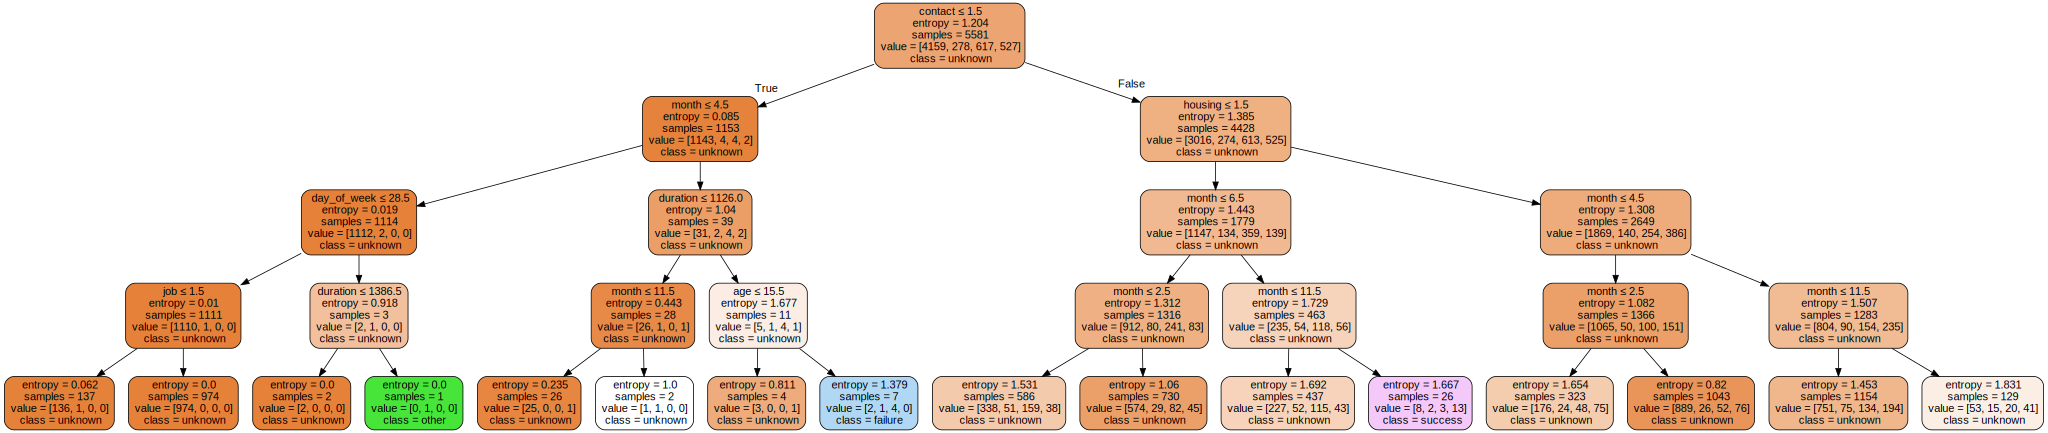

In [31]:
#Vẽ cây quyết định
dot_df = tree.export_graphviz(clf, out_file=None,
                              feature_names=X_train.columns,
                              class_names=['unknown', 'other', 'failure', 'success'],
                              filled=True, rounded=True,
                              special_characters=True
                              )
graph = graphviz.Source(dot_df)
graph.render("entropy.jpg")
graph


# Mục mới

In [35]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#In ma trận dự đoán
cm = confusion_matrix(y_test,yp_test)
print(cm)


[[4156    0    0   11]
 [ 254    0    0    5]
 [ 602    0    1    8]
 [ 529    0    0   15]]


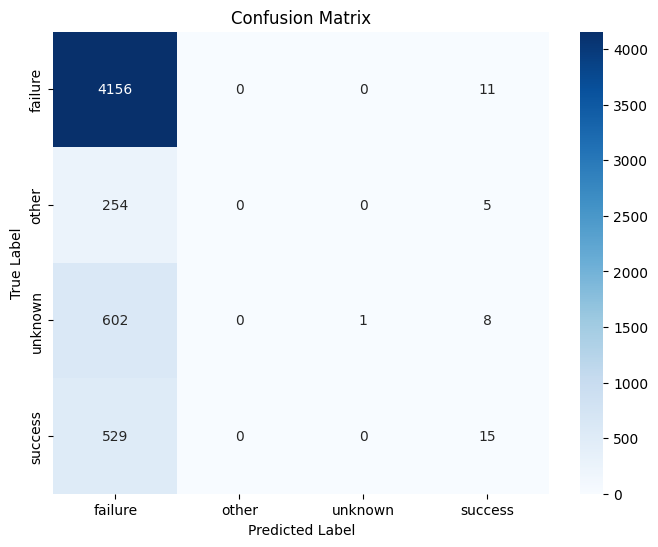

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, clf.predict(X_test))

# Vẽ ma trận nhầm lẫn dưới dạng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
test = []
a = ['age','job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','duration']

for i in a:
    value = int(input(f'Nhập giá trị {i}: '))  # Sử dụng f-string để hiển thị tên cột
    test.append(value)  # Thêm giá trị nhập vào danh sách test thay vì tên cột

Prediction = clf.predict([test])  # Đưa danh sách test vào mô hình để dự đoán

print('Kết quả dự đoán là:', Prediction[0])  # In giá trị dự đoán

if Prediction == 1:
    print('unknown')
elif Prediction == 3:
    print('failure')
elif Prediction == 2:
    print('other')
else:
    print('success')


Nhập giá trị age: 11
Nhập giá trị job: 11
Nhập giá trị marital: 1
Nhập giá trị education: 1
Nhập giá trị default: 1
Nhập giá trị housing: 1
Nhập giá trị loan: 1
Nhập giá trị contact: 1
Nhập giá trị month: 1
Nhập giá trị day_of_week: 1
Nhập giá trị duration: 1
Kết quả dự đoán là: 1
unknown


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
